In [1]:
!pip install ipympl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


interactive(children=(IntSlider(value=20, description='period', max=200, step=5), Dropdown(description='window…

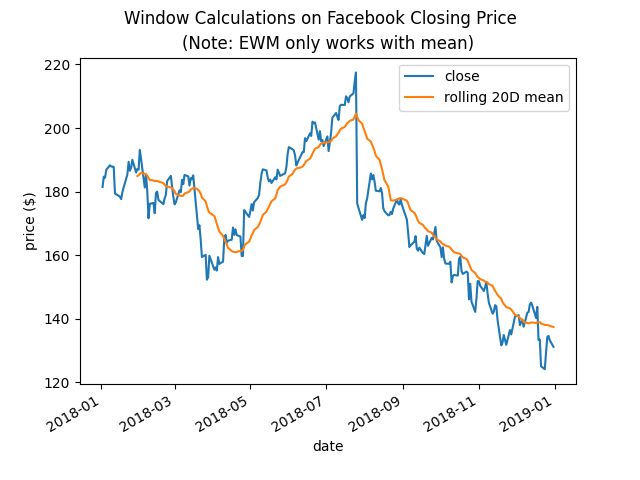

In [2]:
%matplotlib widget
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd


fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True)

def window_calculations(df):
    def plot_viz(period=20, window_type='rolling', agg='mean'):
        ax = df.plot(y='close')
        window_func = getattr(df.close, window_type)
        if window_type == 'rolling':
            kwargs = {'window': period}
        elif window_type == 'expanding':
            kwargs = {'min_periods': period}
        elif window_type == 'ewm':
            kwargs = {'span': period}
            if agg != 'mean':
                print('Changing to mean')
                agg = 'mean'
        window_func(**kwargs).agg(agg).plot(ax=ax, label=f'{window_type} {period}D {agg}')

        plt.suptitle('Window Calculations on Facebook Closing Price')
        plt.title('(Note: EWM only works with mean)')
        plt.ylabel('price ($)')
        plt.legend()
    
    return plot_viz
interact(
    window_calculations(fb), 
    period=(0, 200, 5), 
    window_type=['rolling', 'expanding', 'ewm'], 
    agg=['sum', 'min', 'max', 'mean']
);